# Springback UV map

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

from mesh_predictor import ProjectionPredictor

In [ ]:
doe = pd.read_csv('../data/doe.csv')

In [ ]:
data = pd.read_csv('../data/springback_uvmap.csv')
data.drop(data[data.doe_id == 1000].index, inplace=True)
data.drop(data[data.doe_id == 247].index, inplace=True)

In [4]:
reg = ProjectionPredictor()
reg.load_data(
    doe = doe,
    data = data,
    index='doe_id',
    process_parameters = [
        'Blechdicke', 
        'Niederhalterkraft', 
        'Ziehspalt', 
        'Einlegeposition', 
        'Ziehtiefe',
        'Rp0',
    ],
    categorical = [
        'Ziehspalt', 
        'Ziehtiefe',
    ],
    position = ['u', 'v'],
    output = ['x', 'y', 'z'] ,#, 'thickness', 'epseqpl', 'thinning']
    validation_split=0.1,
    validation_method='leaveoneout',
    position_scaler='minmax'
)
reg.save_config("../models/springback_uvmap_xyz.pkl")

In [5]:
reg.data_summary()

Data summary
------------------------------------------------------------

Process parameters:
	- Blechdicke : numerical [ 0.99  ...  1.48 ]
	- Niederhalterkraft : numerical [ 10  ...  500 ]
	- Ziehspalt : categorical [1.6, 2.4]
	- Einlegeposition : numerical [ -5  ...  5 ]
	- Ziehtiefe : categorical [30, 50, 70]
	- Rp0 : numerical [ 133.18263199999998  ...  296.5565 ]
Input variables:
	- u : numerical, [ 0.0 / 1.0 ] 
	- v : numerical, [ 0.0 / 1.0 ] 
Output variable(s):
	- x : numerical, [ -202.42731 / 202.42731 ]
	- y : numerical, [ -118.32256 / 96.918961 ]
	- z : numerical, [ 0.0 / 73.213165 ]

Inputs (16697652, 11)
Outputs (16697652, 3)
Total number of experiments: 725
Total number of samples: 16697652
Number of training samples: 15068936
Number of test samples: 1628716
Number of experiments in the test set: 72


In [ ]:
config = {
    'batch_size': 2048*16,
    'max_epochs': 100,
    'layers': [256, 256, 256, 256, 256],
    'dropout': 0.0,
    'learning_rate': 0.001,
    'activation': 'lrelu'
}

reg.custom_model(save_path='../models/best_uv_xyz_model', config=config, verbose=True)
reg.training_summary()

In [ ]:
reg.load_network('../models/best_uv_xyz_model')

Doe_ID 550


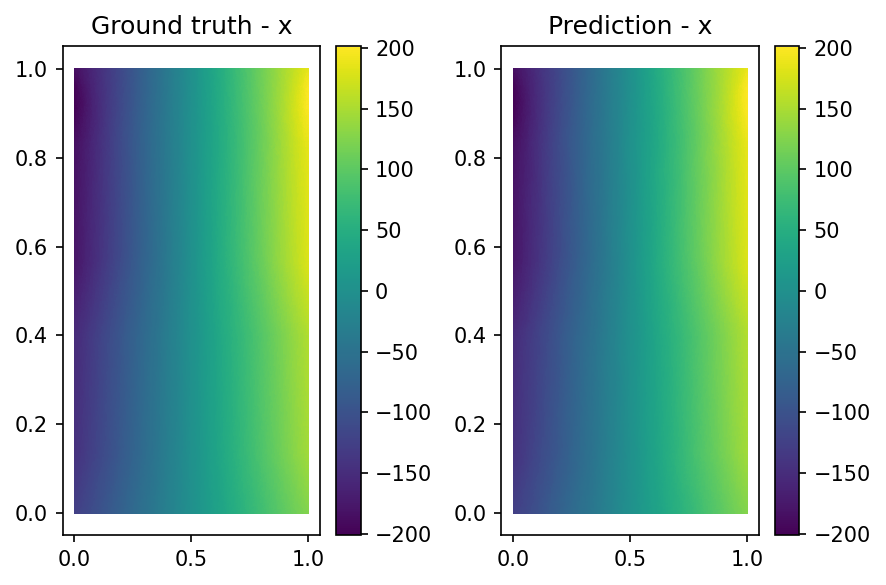

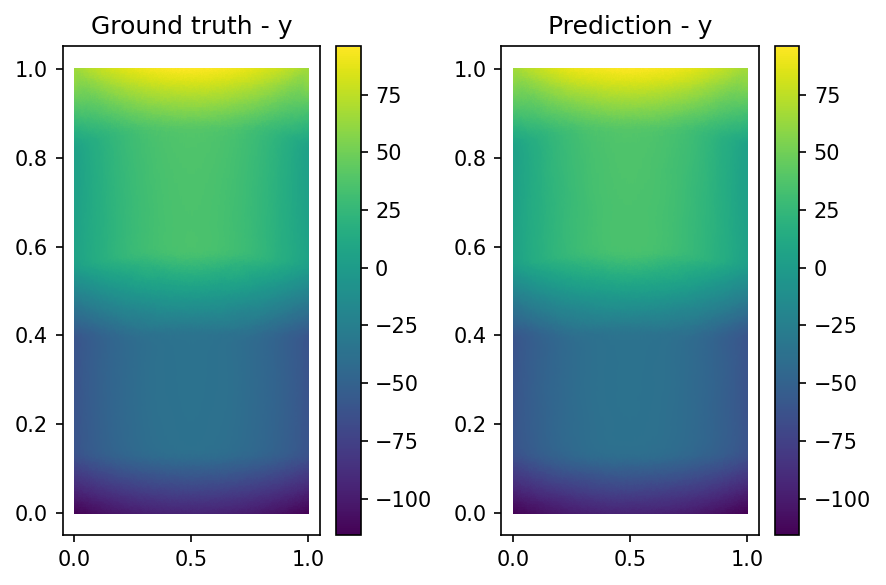

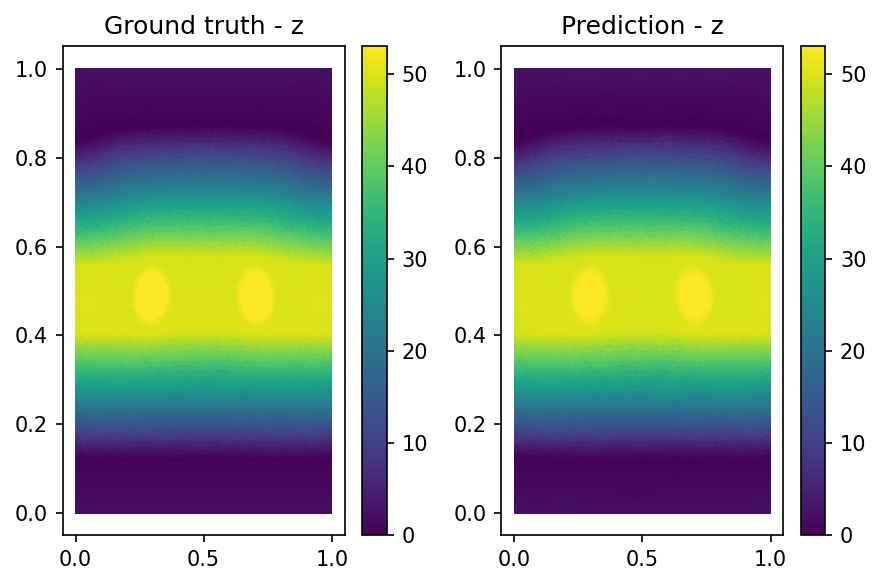

In [7]:
idx = np.random.choice(data['doe_id'].unique()) 
print("Doe_ID", idx)
reg.compare(440)

Doe_ID 909


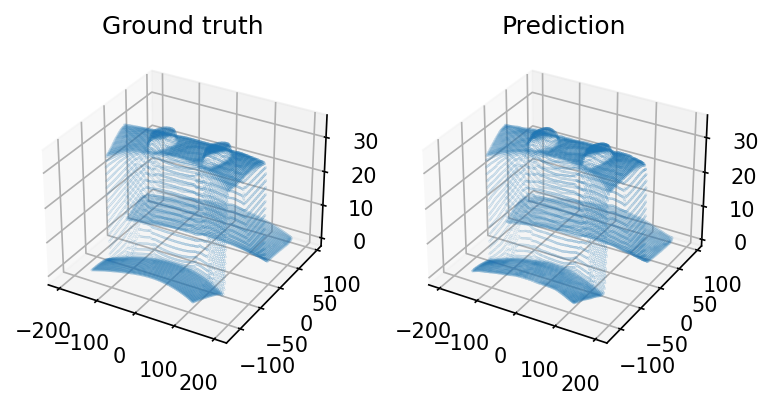

In [30]:
idx = np.random.choice(data['doe_id'].unique()) 
print("Doe_ID", idx)
reg.compare_xyz(idx)

In [9]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

def plotly_show_surface(x, y):
    # Configure the trace.
    trace = go.Scatter3d(
        x=y[0, :, :].flatten(),  
        y=y[1, :, :].flatten(),
        z=y[2, :, :].flatten(),
        mode='markers',
        marker={
            'size': 0.2,
            'opacity': 0.8,
        }
    )

    # Configure the layout.
    layout = go.Layout(
        margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
    )

    data = [trace]

    plot_figure = go.Figure(data=data, layout=layout)

    # Render the plot.
    plotly.offline.iplot(plot_figure)


%matplotlib inline
plt.rcParams['figure.dpi'] = 150

def mpl_show_surface(x, y):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    p = ax.scatter(
        y[0, :, :].flatten(),  
        y[1, :, :].flatten(),
        y[2, :, :].flatten(),
        s=0.001
    )

In [ ]:
x, y = reg.predict({
        'Blechdicke': 1.01, 
        'Niederhalterkraft': 410.0, 
        'Ziehspalt': 2.4, 
        'Einlegeposition': -5, 
        'Ziehtiefe': 30,
        'Stempel_ID': 3,
        'E': 191.37245,
        'Rp0': 138.22696,
        'Rp50': 449.528189,
    }, 
    shape=(500, 500))

plotly_show_surface(x, y)

In [ ]:
reg.interactive(mpl_show_surface, positions=(500, 500))